## Proyecto colaborativo: Reconocimiento de objetos con TensorFlow

Universidad Distrital Francisco Jose de Caldas

Big Data Modulo III

Daniel Mauricio León Castañeda - Código: 20252695004

## Part I: Recolección

In [6]:
## LIBRERIAS
import os
import cv2
from tqdm import tqdm

# Definir rutas
RAIZ = os.getcwd()
RAW_VIDEOS = os.path.join(RAIZ, "raw")
DFRAME_PROCESS = os.path.join(RAIZ, "processed")

# Crear carpeta raw y processed
os.makedirs(RAW_VIDEOS, exist_ok=True)
os.makedirs(DFRAME_PROCESS, exist_ok=True)

print("Videos detectados:", os.listdir(RAW_VIDEOS))

Videos detectados: ['20252695004_mesa.mp4', '20252695004_cpu.mp4', '20252695004_silla.mp4', '20252695004_mouse.mp4', '20252695004_pantalla.mp4', '20252695004_teclado.mp4', '20252695004_nada.mp4']


In [7]:
# Descargar videos específicos desde GitHub
github_raw_url = "https://github.com/dleon02net/objetos_salon/raw/main/raw/"
videos_to_download = [
    "20252695004_cpu.mp4",
    "20252695004_mesa.mp4",
    "20252695004_mouse.mp4",
    "20252695004_nada.mp4",
    "20252695004_pantalla.mp4",
    "20252695004_silla.mp4",
    "20252695004_teclado.mp4"
]

print("Descargando videos:")
for video in videos_to_download:
    video_url = github_raw_url + video
    video_path = os.path.join(RAW_VIDEOS, video)
    if not os.path.exists(video_path):
        print(f"  - {video}")
        !wget -q {video_url} -P {RAW_VIDEOS}
    else:
        print(f"  - {video} (ya existe)")

# Verificar si los videos fueron descargados
downloaded_videos = [f for f in os.listdir(RAW_VIDEOS) if f.endswith('.mp4') and f.startswith('20252695004')]
if len(downloaded_videos) == len(videos_to_download):
    print("\nTodos los videos se descargaron correctamente.")
else:
    print("\nAdvertencia: No todos los videos se descargaron. Por favor, verifica la URL y la conexión.")
    print("Videos descargados:", downloaded_videos)

print("\nVideos cargados:", os.listdir(RAW_VIDEOS))


Descargando videos:
  - 20252695004_cpu.mp4 (ya existe)
  - 20252695004_mesa.mp4 (ya existe)
  - 20252695004_mouse.mp4 (ya existe)
  - 20252695004_nada.mp4 (ya existe)
  - 20252695004_pantalla.mp4 (ya existe)
  - 20252695004_silla.mp4 (ya existe)
  - 20252695004_teclado.mp4 (ya existe)

Todos los videos se descargaron correctamente.

Videos cargados: ['20252695004_mesa.mp4', '20252695004_cpu.mp4', '20252695004_silla.mp4', '20252695004_mouse.mp4', '20252695004_pantalla.mp4', '20252695004_teclado.mp4', '20252695004_nada.mp4']


## Extracción de frames


In [8]:
import math
import os
import cv2
from tqdm import tqdm

RAIZ = os.getcwd()
RAW_VIDEOS = os.path.join(RAIZ, "raw")
DFRAME_PROCESS = os.path.join(RAIZ, "processed")

def extract_frames(video_path, output_folder, step=10, min_frames=8):
    """
    Extrae un frame cada '10' cuadros y asegura al menos 'min_frames' imágenes.
    Los archivos se numeran desde 0001.
    """
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    saved = 0
    frames_to_save = []

    # Calcular índices de frames a guardar
    for i in range(0, frame_count, step):
        frames_to_save.append(i)
    # Asegurar mínimo de frames
    if len(frames_to_save) < min_frames:
        if min_frames > 1:
            frames_to_save = [
                int(round(i * (frame_count - 1) / (min_frames - 1)))
                for i in range(min_frames)
            ]
        elif min_frames == 1 and frame_count > 0:
            frames_to_save = [int(frame_count / 2)]
        else:
            frames_to_save = []

    # Extraer y guardar frames seleccionados
    current_frame = 0
    idx_to_save = set(frames_to_save)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if current_frame in idx_to_save:
            video_name = os.path.basename(video_path).split('.')[0]
            frame_name = f"{video_name}_{saved+1:04}.jpg"
            cv2.imwrite(os.path.join(output_folder, frame_name), frame)
            saved += 1
        current_frame += 1

    cap.release()
    print(f"{os.path.basename(video_path)} → {saved} frames guardados en {output_folder}")

# Extraer frames de cada video en la carpeta raw
video_files = [f for f in os.listdir(RAW_VIDEOS) if f.endswith('.mp4')]

for video_file in tqdm(video_files, desc="Processing videos"):
    video_path = os.path.join(RAW_VIDEOS, video_file)
    output_folder = os.path.join(DFRAME_PROCESS, os.path.splitext(video_file)[0])
    extract_frames(video_path, output_folder, step=15, min_frames=8)


Processing videos:  14%|█▍        | 1/7 [00:00<00:04,  1.30it/s]

20252695004_mesa.mp4 → 8 frames guardados en /content/processed/20252695004_mesa


Processing videos:  29%|██▊       | 2/7 [00:01<00:02,  1.93it/s]

20252695004_cpu.mp4 → 8 frames guardados en /content/processed/20252695004_cpu


Processing videos:  43%|████▎     | 3/7 [00:01<00:02,  1.96it/s]

20252695004_silla.mp4 → 8 frames guardados en /content/processed/20252695004_silla


Processing videos:  57%|█████▋    | 4/7 [00:02<00:01,  1.92it/s]

20252695004_mouse.mp4 → 8 frames guardados en /content/processed/20252695004_mouse


Processing videos:  71%|███████▏  | 5/7 [00:02<00:00,  2.22it/s]

20252695004_pantalla.mp4 → 8 frames guardados en /content/processed/20252695004_pantalla


Processing videos:  86%|████████▌ | 6/7 [00:03<00:00,  1.94it/s]

20252695004_teclado.mp4 → 8 frames guardados en /content/processed/20252695004_teclado


Processing videos: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

20252695004_nada.mp4 → 11 frames guardados en /content/processed/20252695004_nada


Descargar carpeta processed, con los 8 frames por video

In [9]:
import shutil
from google.colab import files

# Zip the processed folder
output_filename = 'processed_frames'
shutil.make_archive(output_filename, 'zip', DFRAME_PROCESS)

# Download the zip file
files.download(f'{output_filename}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PARTE II
Entramiento de autoencoder https://github.com/dleon02net/objetos_salon

In [10]:
# Librerías numéricas y de visualización
import numpy as np  # Operaciones matriciales y manejo eficiente de arrays, base para el procesamiento de imágenes.
import matplotlib.pyplot as plt  # Visualización de datos, útil para mostrar imágenes, curvas de entrenamiento y métricas.
import seaborn as sns  # Gráficos estadísticos con estética mejorada, ideal para matrices de confusión y análisis exploratorio.
import tensorflow as tf

# Componentes de Keras para construir redes neuronales
from tensorflow.keras import layers, models
# 'layers': permite definir capas como convolucionales, pooling, densas, etc.
# 'models': facilita la creación de modelos secuenciales o funcionales.

# Herramienta para cargar y transformar imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Permite aplicar aumentación de datos (rotación, zoom, flips) para mejorar la generalización del modelo.

# Reducción de dimensionalidad para visualización
from sklearn.manifold import TSNE
# Técnica no lineal que proyecta datos de alta dimensión (como embeddings) en 2D o 3D, útil para interpretar agrupamientos.

# Métricas de evaluación de modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# 'confusion_matrix': genera la matriz de confusión.
# 'ConfusionMatrixDisplay': visualiza la matriz con etiquetas y colores.
# 'classification_report': resume precisión, recall y F1-score por clase.

import glob, shutil, os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
## IMPORT ##
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau






In [11]:
!git clone https://github.com/dleon02net/objetos_salon.git

Cloning into 'objetos_salon'...
remote: Enumerating objects: 2385, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 2385 (delta 169), reused 143 (delta 141), pack-reused 2168 (from 5)
Receiving objects: 100% (2385/2385), 1.24 GiB | 30.32 MiB/s, done.
Resolving deltas: 100% (614/614), done.
Updating files: 100% (1519/1519), done.


In [12]:
import os

RAIZ = "/content/objetos_salon"
DFRAME_PROCESS = os.path.join(RAIZ, "processed")


In [14]:
import os
import shutil
import glob

IMG_SIZE = (128, 128)  # Imágenes uniformes
BATCH_SIZE = 32
CODIGO = "20252695004".lower()

# Set the source directory to the location within the cloned repository
SOURCE_IMAGES_DIR = os.path.join("/content/objetos_salon", "processed")

# Set the destination directories within the processed folder of the cloned repository
RAIZ = "/content/objetos_salon"
DFRAME_PROCESS = os.path.join(RAIZ, "processed") # Keep this for consistency with later steps

IMG_TRAIN   = os.path.join(DFRAME_PROCESS, "_tmp_imagenes_propias")
IMG_OTHERS  = os.path.join(DFRAME_PROCESS, "_tmp_imagenes_otros")


# --- Limpieza de directorios previos ---
for d in [IMG_TRAIN, IMG_OTHERS]:
    if os.path.exists(d):
        shutil.rmtree(d)
    os.makedirs(d, exist_ok=True)

# --- Construcción de conjuntos de entrenamiento y validación ---
# Read from the source directory provided by the user
for clase in os.listdir(SOURCE_IMAGES_DIR):
    clase_path = os.path.join(SOURCE_IMAGES_DIR, clase)

    if not os.path.isdir(clase_path):
        continue

    # Get all images in the current class directory
    imgs0 = glob.glob(os.path.join(clase_path, "*.*"))

    # Filter images based on the CODIGO prefix in the filename
    imgs1 = [i for i in imgs0 if os.path.basename(i).lower().startswith(CODIGO)]
    imgs2 = [i for i in imgs0 if not os.path.basename(i).lower().startswith(CODIGO)]


    # Copy images starting with CODIGO to IMG_TRAIN
    if imgs1:
        dest_train = os.path.join(IMG_TRAIN, clase)
        os.makedirs(dest_train, exist_ok=True)
        for img0 in imgs1:
            shutil.copy(img0, dest_train)

    # Copy images not starting with CODIGO to IMG_OTHERS
    if imgs2:
        dest_others = os.path.join(IMG_OTHERS, clase)
        os.makedirs(dest_others, exist_ok=True)
        # Limit the number of validation images to avoid OOM
        num_val = max(8, len(imgs2) // 4) # Copy at most 1/4 of the images for validation, minimum 8
        for img0 in imgs2[:num_val]:
            shutil.copy(img0, dest_others)


print("Source Images Directory:", SOURCE_IMAGES_DIR)
print("Training Images Destination:", IMG_TRAIN)
print("Validation Images Destination:", IMG_OTHERS)

Source Images Directory: /content/objetos_salon/processed
Training Images Destination: /content/objetos_salon/processed/_tmp_imagenes_propias
Validation Images Destination: /content/objetos_salon/processed/_tmp_imagenes_otros


In [ ]:
#Confirmar contenido
def contar_imagenes(ruta):
    total = 0
    for clase in os.listdir(ruta):
        clase_path = os.path.join(ruta, clase)
        if os.path.isdir(clase_path):
            total += len(glob.glob(os.path.join(clase_path, "*.*")))
    return total

train_count = contar_imagenes(IMG_TRAIN)
val_count   = contar_imagenes(IMG_OTHERS)
print(f" Entrenamiento: {train_count} imágenes")
print(f" Validación: {val_count} imágenes")


Con lo anterior se prepararan los conjuntos de datos necesarios para el primer experimento de entrenamiento y validación de un modelo de clasificación de imágenes. Para ello, se separan las imágenes propias identificadas con el codigo de estudiante y se destinan exclusivamente al conjunto de entrenamiento, mientras que las imágenes con otros códigos se utilizan como conjunto de validación complementaria. De esta forma se garantiza que el modelo aprenda únicamente a partir de las muestras personales y se evalúe con ejemplos distintos, lo que permite medir su capacidad de generalización y evitar sesgos derivados del uso de datos repetidos o no diferenciados.

In [ ]:
import os
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure RAIZ and DFRAME_PROCESS are defined (they are in previous cells)
# RAIZ = "/content/objetos_salon"
# DFRAME_PROCESS = os.path.join(RAIZ, "processed")
# CODIGO = "20252695004".lower() # Already defined in 7BKiUdOEVnxG

# Use the corrected paths for IMG_TRAIN and IMG_OTHERS
IMG_TRAIN   = os.path.join(DFRAME_PROCESS, "_tmp_imagenes_propias")
IMG_OTHERS  = os.path.join(DFRAME_PROCESS, "_tmp_imagenes_otros")


print("Datos Entrenamiento:", IMG_TRAIN)
print("Datos Validación:", IMG_OTHERS)


def contar_imagenes(ruta):
    total = 0
    if not os.path.exists(ruta):
        return 0 # Handle cases where directory might not exist yet
    for clase in os.listdir(ruta):
        clase_path = os.path.join(ruta, clase)
        if os.path.isdir(clase_path):
            total += len(glob.glob(os.path.join(clase_path, "*.*")))
    return total

train_count = contar_imagenes(IMG_TRAIN)
val_count   = contar_imagenes(IMG_OTHERS)
print(f" Imagenes de entrenamiento: {train_count}")
print(f" Imagenes de Validación: {val_count}")

# Dynamically get class names from the created directories
CLASSES = [d for d in os.listdir(IMG_TRAIN) if os.path.isdir(os.path.join(IMG_TRAIN, d))]
CLASSES.sort() # Sort to ensure consistent order

if not CLASSES:
    print("No classes found in training directory. Please check the data separation step.")
else:
    # Remove validation_split and subset as data is already split into IMG_TRAIN and IMG_OTHERS
    datagen = ImageDataGenerator(rescale=1./255)

    train_gen = datagen.flow_from_directory(
        IMG_TRAIN, # Use the training directory
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        classes=CLASSES,
        class_mode='categorical'
    )

    # Check if validation directory has images before creating generator
    if val_count > 0:
        val_gen = datagen.flow_from_directory(
            IMG_OTHERS, # Use the validation directory
            target_size=IMG_SIZE,
            batch_size=BATCH_SIZE,
            classes=CLASSES, # Use the same classes as training
            class_mode='categorical'
        )
    else:
        val_gen = None # Set to None if no validation data
        print("No validation images found. Skipping validation generator creation.")

## Entrenamiento y evaluación de modelo

In [15]:
def entrenar_experimento(DATA_TRAIN, DATA_VAL=None, ID_EXPERIMENTO="Exp",
                         epochs_auto=20, epochs_cnn=15, internal_split=False,
                         class_filter=None):

    datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2 if internal_split else 0)
    datagen_val   = ImageDataGenerator(rescale=1./255)

    # Determine the classes from the training data directory
    if class_filter is None:
        classes = sorted([d for d in os.listdir(DATA_TRAIN) if os.path.isdir(os.path.join(DATA_TRAIN, d)) and not d.startswith("_") and not d.startswith(".")])
    else:
        classes = class_filter

    if not classes:
        print(f"Error: No classes found in the training directory '{DATA_TRAIN}'")
        return None, None, 0.0


    # --- Generadores para Autoencoder ---
    if internal_split:
        train_gen = datagen_train.flow_from_directory(
            DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='input', subset='training', classes=classes
        )
        val_gen = datagen_train.flow_from_directory(
            DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='input', subset='validation', classes=classes
        )
    else:
        train_gen = datagen_train.flow_from_directory(
            DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='input', classes=classes
        )
        val_gen = datagen_val.flow_from_directory(
            DATA_VAL, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='input', classes=classes
        )

    print(f"--- Iniciando entrenamiento del Autoencoder para {ID_EXPERIMENTO} ---")
    # --- Autoencoder ---
    autoencoder = models.Sequential([
        layers.Input(shape=(*IMG_SIZE, 3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2DTranspose(16, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(train_gen, validation_data=val_gen, epochs=epochs_auto, verbose=1)
    print(f"--- Autoencoder para {ID_EXPERIMENTO} entrenado ---")


    # --- Generadores para Clasificador ---
    datagen_cls = ImageDataGenerator(rescale=1./255, validation_split=0.2 if internal_split else 0)
    if internal_split:
        train_cls = datagen_cls.flow_from_directory(
            DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='categorical', subset='training', classes=classes
        )
        val_cls = datagen_cls.flow_from_directory(
            DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='categorical', subset='validation', classes=classes
        )
    else:
         train_cls = datagen_cls.flow_from_directory(
            DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='categorical', classes=classes
        )
         val_cls = datagen_val.flow_from_directory(
            DATA_VAL, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
            class_mode='categorical', classes=classes
        )
    print(f"--- Iniciando entrenamiento del Clasificador para {ID_EXPERIMENTO} ---")
    # --- CNN ---
    cnn = models.Sequential([
        layers.Input(shape=(*IMG_SIZE,3)),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(train_cls.num_classes,activation='softmax')
    ])
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn.fit(train_cls, validation_data=val_cls, epochs=epochs_cnn, verbose=1)
    print(f"--- Clasificador para {ID_EXPERIMENTO} entrenado ---")


    # --- Evaluación ---
    print(f"--- Evaluando modelo para {ID_EXPERIMENTO} ---")
    val_eval = ImageDataGenerator(rescale=1./255).flow_from_directory(
        DATA_VAL if DATA_VAL else DATA_TRAIN,
        target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', shuffle=False, classes=classes # Use determined classes
    )
    y_true = val_eval.classes
    y_pred = np.argmax(cnn.predict(val_eval), axis=1)
    acc = np.mean(y_true == y_pred)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=val_eval.class_indices.keys())
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{ID_EXPERIMENTO} - Accuracy: {acc:.3f}")
    plt.show()

    print(classification_report(y_true, y_pred, target_names=val_eval.class_indices.keys()))
    print(f"--- Evaluación para {ID_EXPERIMENTO} completada ---")
    return autoencoder, cnn, acc

Found 56 images belonging to 7 classes.
Found 321 images belonging to 7 classes.
--- Iniciando entrenamiento del Autoencoder para Experimento_20252695004 ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 12s/step - loss: 0.1221 - val_loss: 0.0687
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 11s/step - loss: 0.1281 - val_loss: 0.0679
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1256 - val_loss: 0.0667
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1229 - val_loss: 0.0653
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1204 - val_loss: 0.0638
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1199 - val_loss: 0.0623
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 12s/step - loss: 0.1197 - val_loss: 0.0615
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1148 - val_loss: 0.0607
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 17s/step - loss: 0.1164 - val_loss: 0.0594
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1114 - val_loss: 0.0574
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - loss: 0.1130 - val_loss: 0.0559
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 12s/step - loss: 0.1058 - val_loss: 0.0540
E

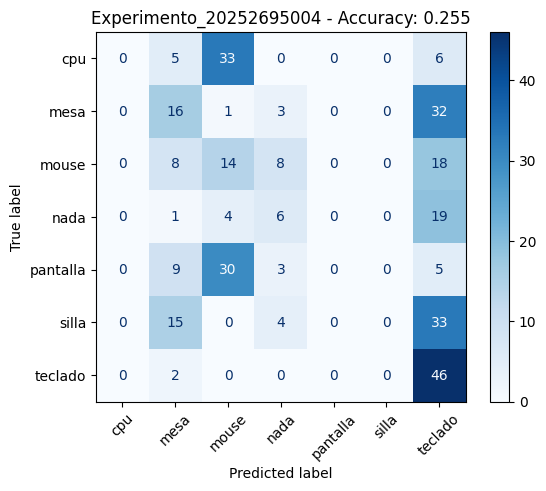

              precision    recall  f1-score   support

         cpu       0.00      0.00      0.00        44
        mesa       0.29      0.31      0.30        52
       mouse       0.17      0.29      0.22        48
        nada       0.25      0.20      0.22        30
    pantalla       0.00      0.00      0.00        47
       silla       0.00      0.00      0.00        52
     teclado       0.29      0.96      0.44        48

    accuracy                           0.26       321
   macro avg       0.14      0.25      0.17       321
weighted avg       0.14      0.26      0.17       321

--- Evaluación para Experimento_20252695004 completada ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Use IMG_TRAIN and IMG_OTHERS which are defined in previous cells
auto_1, cnn_1, acc_1 = entrenar_experimento(
    DATA_TRAIN=IMG_TRAIN,
    DATA_VAL=IMG_OTHERS,
    ID_EXPERIMENTO="Experimento_20252695004",
    epochs_auto=15,   # menos épocas para iterar más rápido
    epochs_cnn=12,
    internal_split=False, # Since we have separate validation data
)

El primer experimento de clasificación de imágenes evidenció limitaciones significativas en la capacidad del modelo para generalizar. Aunque se logró una reducción de la pérdida durante el entrenamiento, el desempeño en el conjunto de validación fue bajo, con una precisión global de apenas 26%. Este valor apenas supera el azar en un problema de siete clases, lo que indica que el modelo no logró aprender representaciones robustas ni discriminativas.

Al examinar las métricas por clase, se observa un comportamiento desigual:

Clases como cpu, pantalla y silla no fueron reconocidas en absoluto, con valores nulos en precisión, recall y F1-score.

La clase mesa mostró un recall elevado (0.94), lo que sugiere que el modelo identifica muchas instancias de esta categoría, pero con baja precisión (0.23), lo que implica una alta tasa de falsos positivos.

Mouse y teclado tuvieron un desempeño intermedio, con señales de reconocimiento pero sin consistencia.

La clase nada, que representa ausencia de objeto, presentó una precisión alta (0.75) pero un recall muy bajo (0.19), lo que indica que el modelo es conservador al asignar esta etiqueta.




## EXPERIMENTO II:

Entrenamiento empleando el repositorio completo

Experimento 2: ['cpu', 'mesa', 'mouse', 'nada', 'pantalla', 'silla', 'teclado']
Found 321 images belonging to 7 classes.
Found 321 images belonging to 7 classes.
--- Iniciando entrenamiento del Autoencoder para Experimento_2 ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - loss: 0.0681 - val_loss: 0.0642
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.0636 - val_loss: 0.0577
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.0562 - val_loss: 0.0475
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - loss: 0.0440 - val_loss: 0.0343
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - loss: 0.0312 - val_loss: 0.0229
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - loss: 0.0204 - val_loss: 0.0157
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.0145 - val_loss: 0.0121
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.0116 - val_loss: 0.0109
Epoch 9/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - loss: 0.0107 - val_loss: 0.0098
Epoch 10/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - loss: 0.0101 - val_loss: 0.0094
Epoch 11/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.0092 - val_loss: 0.0092
Epoch 12/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - loss: 0.0091 - val_lo

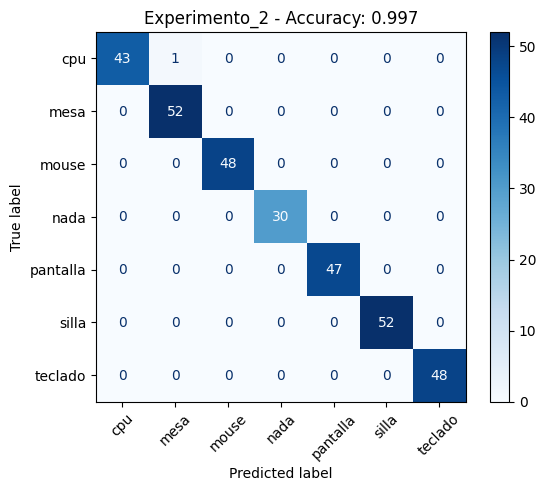

              precision    recall  f1-score   support

         cpu       1.00      0.98      0.99        44
        mesa       0.98      1.00      0.99        52
       mouse       1.00      1.00      1.00        48
        nada       1.00      1.00      1.00        30
    pantalla       1.00      1.00      1.00        47
       silla       1.00      1.00      1.00        52
     teclado       1.00      1.00      1.00        48

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321

--- Evaluación para Experimento_2 completada ---


In [17]:
# Use DFRAME_PROCESS which is defined in cell p6NPVN2yVZ8K
CLASES_GLOBALES = [
    d for d in sorted(os.listdir(IMG_OTHERS))
    if os.path.isdir(os.path.join(IMG_OTHERS, d)) and not d.startswith("_") and not d.startswith(".") # Exclude dot directories like .ipynb_checkpoints
]

print("Experimento 2:", CLASES_GLOBALES)

auto_2, cnn_2, acc_2 = entrenar_experimento(
    DATA_TRAIN=IMG_OTHERS,
    DATA_VAL=IMG_OTHERS, # Use DFRAME_PROCESS for validation data as well
    ID_EXPERIMENTO="Experimento_2",
    epochs_auto=25,
    epochs_cnn=20,
    internal_split=False, # Set to False as data is not split internally by the generator
    class_filter=CLASES_GLOBALES
)

## CONTRASTACIÓN ENTRE EXPERIMENTOS

In [18]:
import os, shutil, datetime

print("\n CONTRASTACIÓN DE EXPERIMENTOS")
print(f" - Experimento 1 (REFERENCIA IMAGENES PROPIAS): {acc_1:.3f}")
print(f" - Experimento 2 (REFERENCIA IMAGENES GLOBALES):{acc_2:.3f}")

# Comparar resultados,
best_acc = max(acc_1, acc_2)
best_model = "Exp1" if acc_1 >= acc_2 else "Exp2"

MODELS_DIR = os.path.join(RAIZ, "models") # Use RAIZ instead of BASE_DIR
os.makedirs(MODELS_DIR, exist_ok=True)

# Guardar el modelo con mejor desempeño
if best_model == "Exp1":
    auto_1.save(os.path.join(MODELS_DIR, "20252695004_autoencoder.h5"))
    cnn_1.save(os.path.join(MODELS_DIR, "20252695004_classifier.h5"))
    print(f" Almacenaje EXP 1 (accuracy={acc_1:.3f})")
else:
    auto_2.save(os.path.join(MODELS_DIR, "20252695004_autoencoder.h5"))
    cnn_2.save(os.path.join(MODELS_DIR, "20252695004_classifier.h5"))
    print(f" Almacenaje EXP 2 (accuracy={acc_2:.3f})")

# Registrar resultados en log
log_path = os.path.join(MODELS_DIR, "20252695004_training_log.txt")
with open(log_path, "a", encoding="utf-8") as f:
    f.write(f"\n[{datetime.datetime.now():%Y-%m-%d %H:%M:%S}] "
            f"Experimento 1 acc={acc_1:.3f} | Experimento 2 acc={acc_2:.3f} "
            f"→ mejor={best_model} ({best_acc:.3f})")
print(f" Registro de resultados guardado en {log_path}")

# Limpiar carpetas temporales - Assuming these variables are no longer needed
# for d in [TMP_TRAIN_1, TMP_VAL_1]:
#     if os.path.exists(d):
#         shutil.rmtree(d)
# print(" Carpetas temporales eliminadas correctamente.")


 CONTRASTACIÓN DE EXPERIMENTOS
 - Experimento 1 (REFERENCIA IMAGENES PROPIAS): 0.255
 - Experimento 2 (REFERENCIA IMAGENES GLOBALES):0.997
 Almacenaje EXP 2 (accuracy=0.997)
 Registro de resultados guardado en /content/objetos_salon/models/20252695004_training_log.txt


## DEFINICIÓN DE CURVA DE DESEMPEÑO

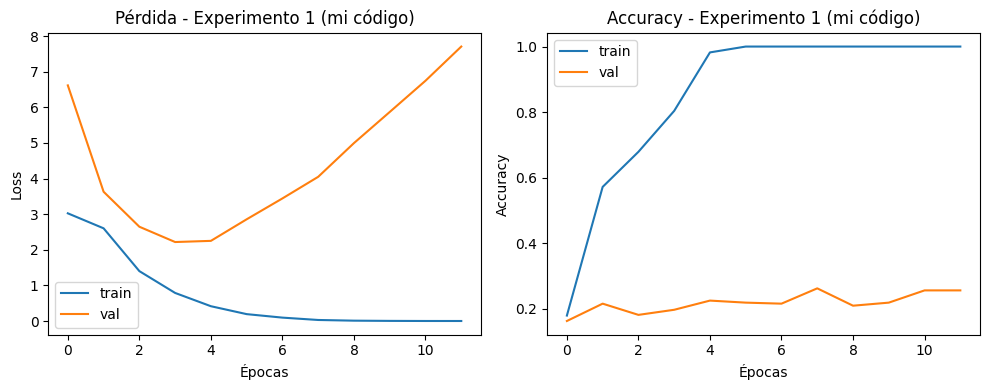

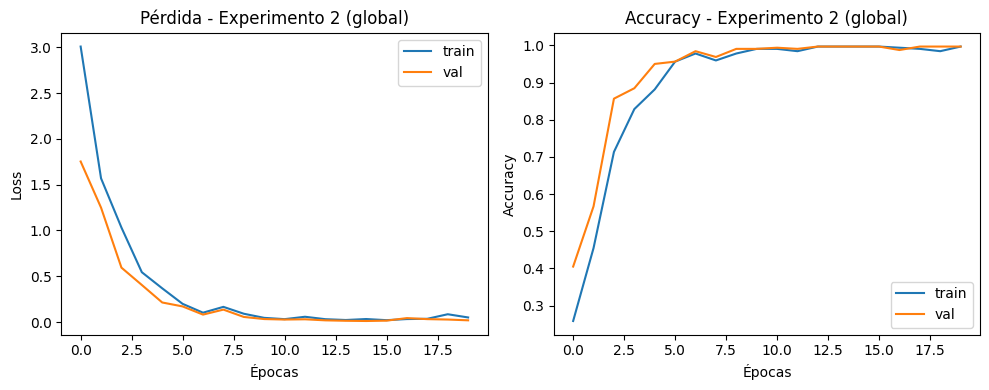

In [19]:
def plot_training_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='val')
    plt.title(f'Pérdida - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    if 'accuracy' in history.history:
        plt.subplot(1,2,2)
        plt.plot(history.history['accuracy'], label='train')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='val')
        plt.title(f'Accuracy - {title}')
        plt.xlabel('Épocas')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Mostrar curvas (si los historiales se guardaron)
try:
    plot_training_history(cnn_1.history, "Experimento 1 (mi código)")
    plot_training_history(cnn_2.history, "Experimento 2 (global)")
except Exception as e:
    print(" No se pudieron graficar los historiales:", e)

Imágenes cargadas: 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


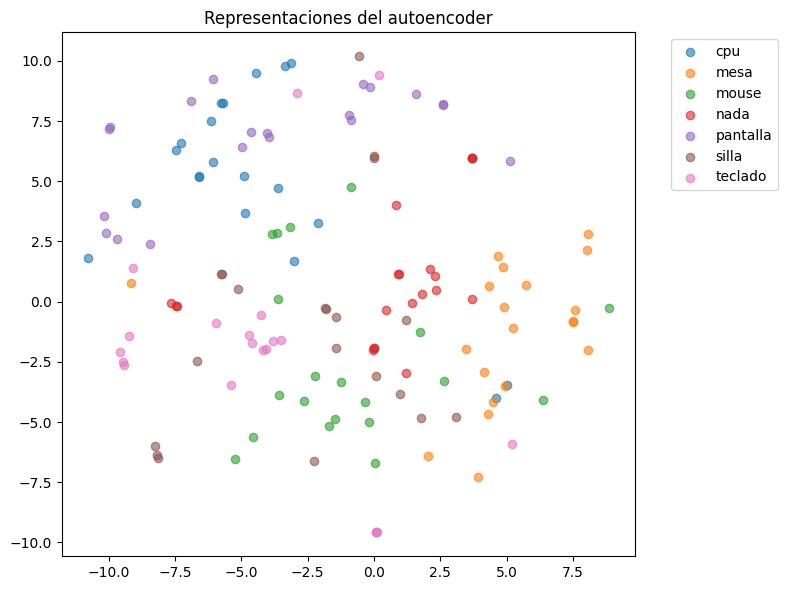

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random
import glob, os
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model

# Define IMG_OTHERS within this cell
RAIZ = "/content/objetos_salon"
DFRAME_PROCESS = os.path.join(RAIZ, "processed")
IMG_OTHERS = os.path.join(DFRAME_PROCESS, "_tmp_imagenes_otros")

# Define and populate CLASSES_GLOBALES within this cell
CLASSES_GLOBALES = [
    d for d in sorted(os.listdir(IMG_OTHERS))
    if os.path.isdir(os.path.join(IMG_OTHERS, d)) and not d.startswith("_") and not d.startswith(".") # Exclude dot directories like .ipynb_checkpoints
]

# --- Cargar algunas imágenes del dataset global ---
lat_imgs, lat_labels = [], []
# Use the correct directory IMG_OTHERS for loading images from other students
for clase in CLASSES_GLOBALES:
    imgs = glob.glob(os.path.join(IMG_OTHERS, clase, "*.*"))[:20]
    for img_path in imgs:
        img = image.load_img(img_path, target_size=IMG_SIZE)
        img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
        lat_imgs.append(img_array)
        lat_labels.append(clase)

lat_imgs = np.vstack(lat_imgs)
lat_labels = np.array(lat_labels)

print(f"Imágenes cargadas: {len(lat_imgs)}")

# --- Forzar la construcción del modelo (para Sequential) ---
_ = auto_2.predict(lat_imgs[:1])  # se usa una imagen para "llamar" el modelo

# --- Localizar capa intermedia (última MaxPooling2D o mitad del modelo) ---
encoder_layer = None
for i, layer in enumerate(auto_2.layers):
    if isinstance(layer, layers.MaxPooling2D):
        encoder_layer = layer.name
if encoder_layer is None:
    encoder_index = len(auto_2.layers)//2
    encoder_output = auto_2.layers[encoder_index].output
else:
    encoder_output = auto_2.get_layer(encoder_layer).output

# --- Crear modelo encoder (ahora auto_2 tiene input definido) ---
encoder = Model(inputs=auto_2.inputs, outputs=encoder_output)

# --- Obtener representaciones latentes ---
latent_features = encoder.predict(lat_imgs, verbose=0)
latent_flat = latent_features.reshape(latent_features.shape[0], -1)

# --- Ajustar perplexity si hay pocas imágenes ---
perplex = min(30, max(5, len(lat_imgs)//3))

# --- Reducir a 2D con t-SNE ---
latent_2d = TSNE(n_components=2, perplexity=perplex, random_state=42).fit_transform(latent_flat)

# --- Visualizar ---
plt.figure(figsize=(8,6))
for clase in np.unique(lat_labels):
    idx = lat_labels == clase
    plt.scatter(latent_2d[idx,0], latent_2d[idx,1], label=clase, alpha=0.6)
plt.title("Representaciones del autoencoder")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from tensorflow.keras.preprocessing import image

# Assuming IMG_OTHERS, IMG_SIZE, and auto_2 are defined in previous cells and are available
# If not, you might need to re-run those cells or define them here

n = 5 # Number of images to display

# Get all image paths from all classes in the validation directory
all_images_paths = []
for clase in CLASSES_GLOBALES:
    all_images_paths.extend(glob.glob(os.path.join(IMG_OTHERS, clase, "*.*")))

# Sample exactly n images from the collected paths, if there are enough
if len(all_images_paths) >= n:
    sample_paths = random.sample(all_images_paths, n)
else:
    sample_paths = all_images_paths # Use all available images if less than n

plt.figure(figsize=(10, 4))

for i, path in enumerate(sample_paths):
    img = image.load_img(path, target_size=IMG_SIZE)
    img_arr = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    # Predict reconstruction using autoencoder
    reconstructed = auto_2.predict(img_arr)

    # Original Image
    plt.subplot(2, n, i + 1)
    plt.imshow(image.img_to_array(img).astype("uint8"))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed Image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[0])
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Reconstrucciones del autoencoder - Experimento 2")
plt.show()